In [1]:
from maelzel.core import *
from maelzel import scoring
from maelzel.scoring import enharmonics


c = getConfig()
c['show.horizontalSpacing'] = 'medium'

‹3B 4D# 4G#›
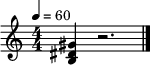

In [2]:
ch = Chord("3B 4Eb 4G#")
ch

‹3B 4Eb 4Ab›
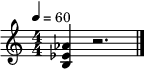

In [3]:
ch = Chord("3B 4Eb! 4G#")
ch

‹3F 3B 4D# 4G# 2♩›
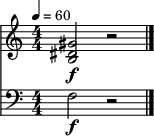

In [4]:
ch = Chord("3f 3b 4d# 4Ab", dur=2, dynamic='f')
ch

‹3F 3B 4D# 4G# 2♩›
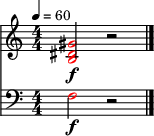

In [5]:
ch.addSymbol(symbols.Notehead(color='red'))
ch

‹3F 3B 4D# 4G# 2♩›
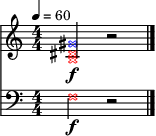

In [6]:
ch = Chord("3f 3b 4d# 4g#", dur=2, dynamic='f')
ch.addSymbol(symbols.Notehead(color='red'))
ch.addSymbol(symbols.Notehead('x'))
ch[-1].addSymbol(symbols.Notehead(color='blue'))
ch

Chord(offset=None, dur=2.0, gliss=False)
     4G#:symbols=[Accidental(parenthesis=True, size=0.9)]
     4Eb:symbols=[Accidental(color=red), Notehead(color=green)]
     3B:symbols=[Notehead(size=0.8)]
     3F


‹3F 3B 4Eb 4Ab 2♩›
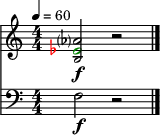

In [7]:
ch = Chord("3f 3b 4Eb! 4g#", dur=2, dynamic='f')
ch[1].addSymbol(symbols.Notehead(size=0.8))
ch[2].addSymbol(symbols.Accidental(color='red'))
ch[2].addSymbol(symbols.Notehead(color='green'))

ch[-1].addSymbol(symbols.Accidental(parenthesis=True, size=0.9))
ch.dump()
ch

here! «0.000:2.000 [3B 4D# 4Ab] gliss mf properties={'resetEnharmonicSlots': True}»
here! «2.000:grace [4C# 4E 4Gb] properties={'.clefHint': {0: 'g', 1: 'g', 2: 'g'}}»


‹3F 3B 4Eb 4Ab 2♩ gliss=4C,4C#,4E,4F#›
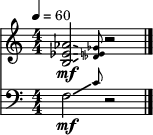

In [2]:
ch = Chord("3f 3b 4D# 4G#", dur=2, dynamic='mf', gliss='4c 4c# 4E 4Gb')
ch

Individual playattrs for notes within a chord are not supported. I think that this would add too much complexity. If you need this, split the chord and set playattrs by note/chord

In [21]:
# ch.setPlay(instr='saw', gain=0.1, position=0.5, fade=0)
ch.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=4)
    Synth(𝍪 preset.saw:502.003, p4=0 idataidx_:5=19 inumbps:6=2 ibplen:7=3 igain:8=0.05 ichan:9=1 ipos:10=0.5 ifadein:11=0 ifadeout:12=0 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kfreqratio:17=0 kQ:18=3 p19=0 p20=53 p21=0.343838 p22=2 ...)
    Synth(𝍪 preset.saw:502.0031, p4=0 idataidx_:5=19 inumbps:6=2 ibplen:7=3 igain:8=0.05 ichan:9=1 ipos:10=0.5 ifadein:11=0 ifadeout:12=0 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kfreqratio:17=0 kQ:18=3 p19=0 p20=59 p21=0.343838 p22=2 ...)
    Synth(𝍪 preset.saw:502.0032, p4=0 idataidx_:5=19 inumbps:6=2 ibplen:7=3 igain:8=0.05 ichan:9=1 ipos:10=0.5 ifadein:11=0 ifadeout:12=0 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kfreqratio:17=0 kQ:18=3 p19=0 p20=63 p21=0.343838 p22=2 ...)
    Synth(𝍪 preset.saw:502.0033, p4=0 idataidx_:5=19 inumbps:6=2 ibplen:7=3 igain:8=0.05 ichan:9=1 ipos:10=0.5 ifadein:11=0 ifadeout:12=0 ipchintrp_:13=0 ifadekind:14=1 ktransp:15=0 klag:16=0.1 kfreqratio:17=0 kQ:18=3 p19=0 p20=68 p21=0.343838 p22=2 ...)

In [23]:
ch.dump()

Chord(offset=None, dur=2.0, gliss=[60.0, 61.0, 64.0, 66.0])
   PlayArgs(instr=saw, gain=0.1, position=0.5, fade=0)
     4G#
     4D#
     3B
     3F
